In [ ]:
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image # to display images
import h5py
import numpy as np

In [ ]:
from google.colab import drive #
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_path = '/content/drive/MyDrive/Brain Tumor'

In [ ]:
coco_dir = os.path.join(dataset_path, 'coco') #
images_dir = os.path.join(coco_dir, 'images')
annotations_file = os.path.join(coco_dir, 'annotations.json')

os.makedirs(images_dir, exist_ok=True)

In [ ]:
mat_files = []
for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".mat") and file != 'cvind.mat':
            mat_files.append(os.path.join(root, file)) #mat_files's path append

In [ ]:
mat_files

['/content/drive/MyDrive/Brain Tumor/Figshare/4.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/6.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/5.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/3.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/2.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/1.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/9.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/17.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/7.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/15.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/16.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/18.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/8.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/19.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/12.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/14.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/20.mat',
 '/content/drive/MyDrive/Brain Tumor/Figshare/10.mat',
 '/content/drive/My

In [ ]:
labels_dict = {1: 'meningioma', 2: 'glioma', 3: 'pituitary tumor'}

In [ ]:
def convert_to_coco_format(mat_files, images_dir, annotations_file):
    coco_data = {
        "info": {},
        "licenses": [],
        "images": [],
        "annotations": [],
        "categories": [
            {"id": 1, "name": "meningioma", "supercategory": "brain_tumor"},
            {"id": 2, "name": "glioma", "supercategory": "brain_tumor"},
            {"id": 3, "name": "pituitary tumor", "supercategory": "brain_tumor"}
        ]
    }

    image_id = 1
    annotation_id = 1

    for mat_file in mat_files:
        with h5py.File(mat_file, 'r') as f: #h5py when we want to read .mat file
            cjdata = f['cjdata']    #cjdata mat file na number store
            image = np.array(cjdata['image']).T    #we convert image as numpy array
            tumor_border = np.array(cjdata['tumorBorder']).flatten() #we read coordinated of tumor and convert it to the 1D array (vector)
            label = int(np.array(cjdata['label'])[0, 0]) # we read the label of particular image

        # Example assumes the images are saved in 'images_dir'
        image_filename = os.path.basename(mat_file).replace('.mat', '.jpg')
        image_path = os.path.join(images_dir, image_filename)
        # Save image to the 'images' folder
        plt.imsave(image_path, image, cmap='gray')

        image_info = {
            "id": image_id,
            "file_name": image_filename,
            "width": image.shape[1],
            "height": image.shape[0]
        }
        coco_data["images"].append(image_info)

        if tumor_border.size > 0:
            tumor_border = tumor_border.reshape(-1, 2)
            x_min, y_min = np.min(tumor_border, axis=0)
            x_max, y_max = np.max(tumor_border, axis=0)
            width = x_max - x_min
            height = y_max - y_min

            annotation = {
                "id": annotation_id,
                "image_id": image_id,
                "category_id": label,
                "bbox": [x_min, y_min, width, height],
                "area": width * height,
                "iscrowd": 0
            }
            coco_data["annotations"].append(annotation)
            annotation_id += 1

        image_id += 1

    # Save JSON file
    with open(annotations_file, 'w') as f:
        json.dump(coco_data, f)

# Convert and save images and annotations
convert_to_coco_format(mat_files, images_dir, annotations_file)

print("Conversion to COCO format completed.")

Conversion to COCO format completed.


In [ ]:
#coco_dir = '/content/drive/MyDrive/BrainTumor/brain_tumor_dataset/coco'
#images_dir = os.path.join(coco_dir, 'images')
#annotations_file = os.path.join(coco_dir, 'annotations.json')

In [ ]:
with open(annotations_file, 'r') as f:
    coco_data = json.load(f)

In [ ]:
def plot_image_with_annotations(image_info, annotations, categories):
    image_filename = image_info['file_name']
    image_path = os.path.join(images_dir, image_filename)
    image = Image.open(image_path)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(image)

    for annotation in annotations:
        bbox = annotation['bbox']
        label_id = annotation['category_id']
        category_name = next(cat['name'] for cat in categories if cat['id'] == label_id)
        x, y, w, h = bbox
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y - 10, category_name, fontsize=12, color='r')

    plt.axis('off')
    plt.title(f"Image with Annotations")
    plt.show()

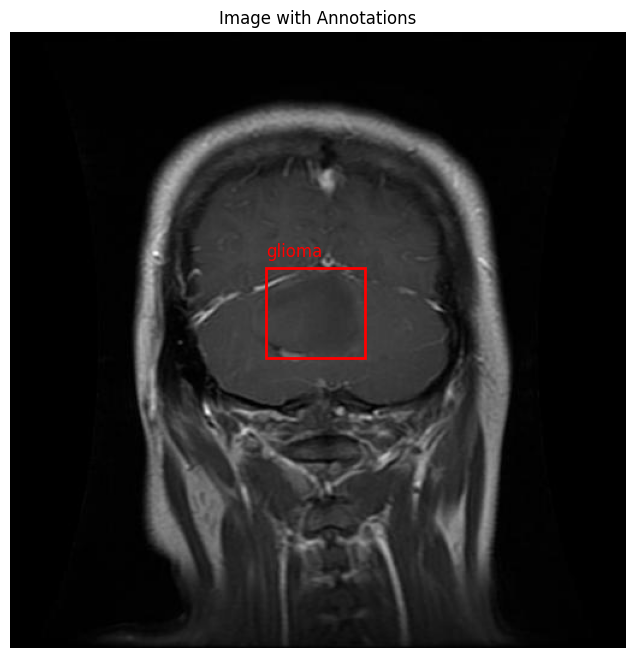

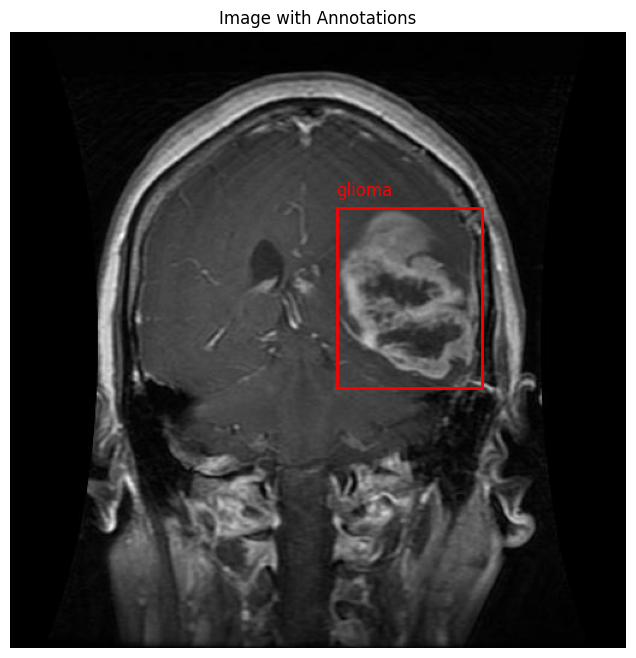

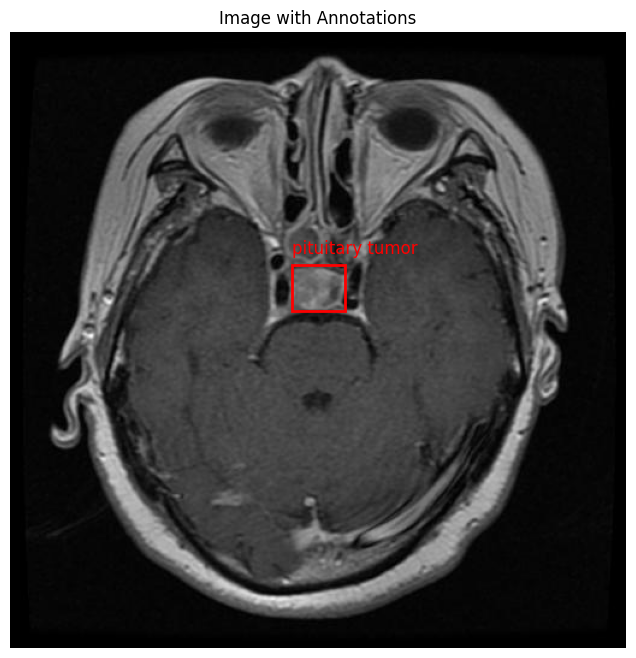

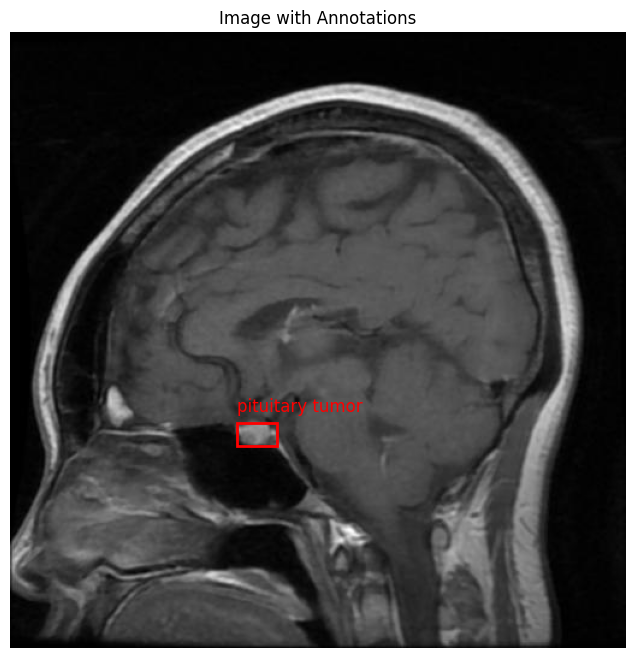

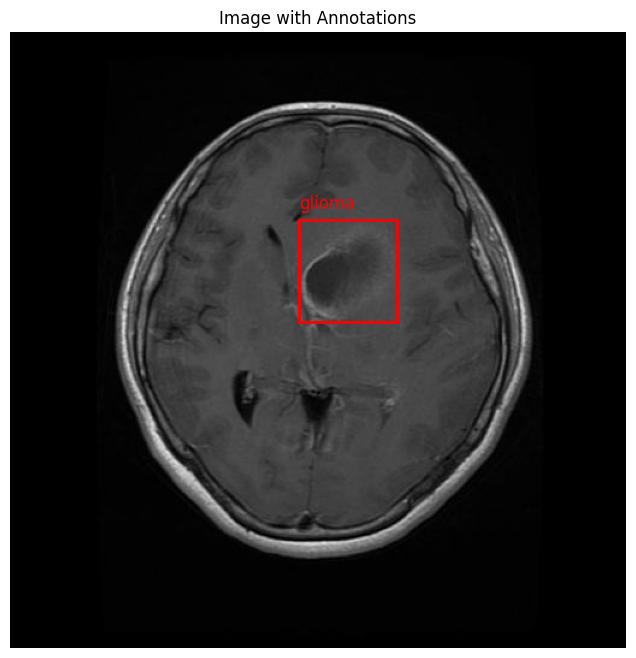

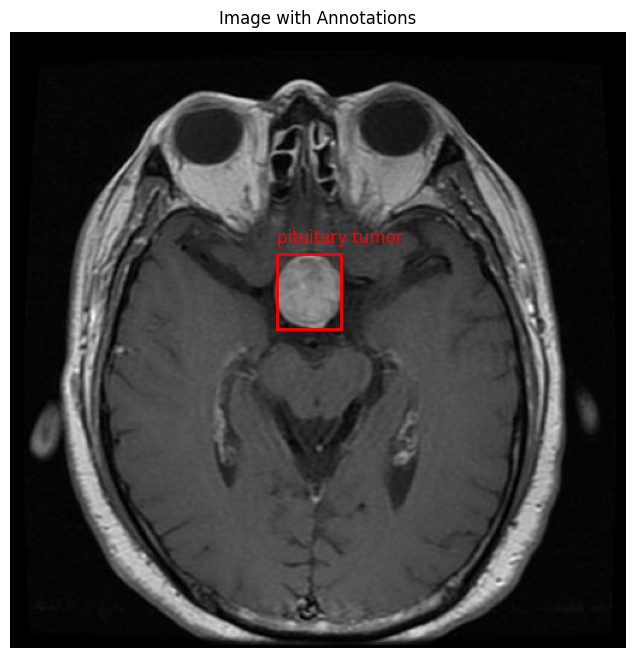

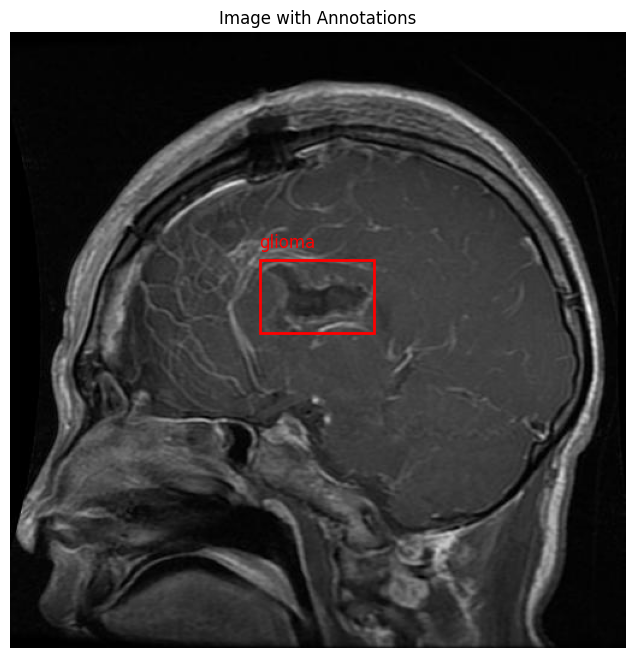

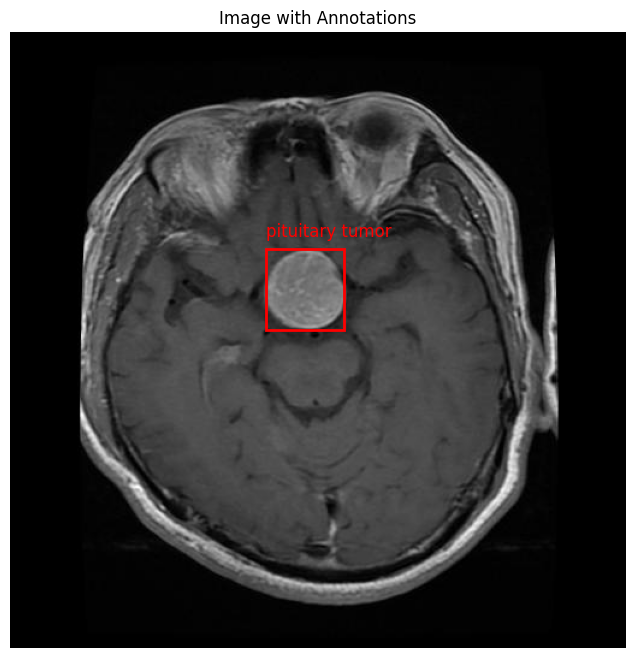

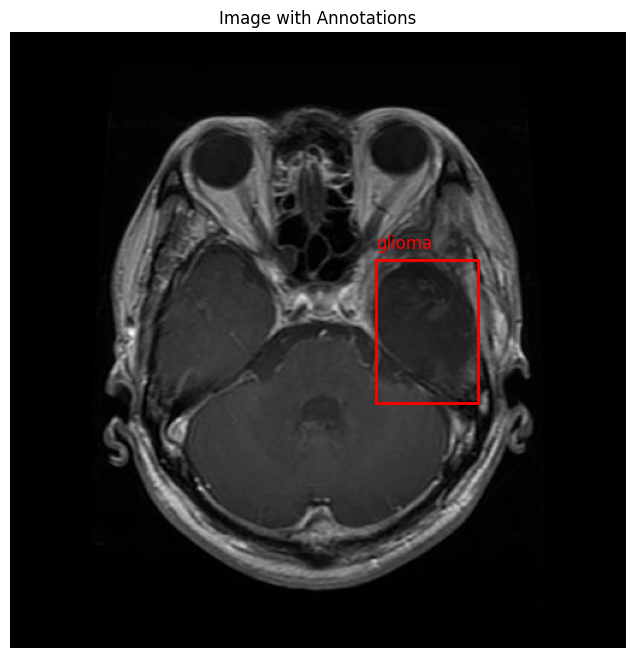

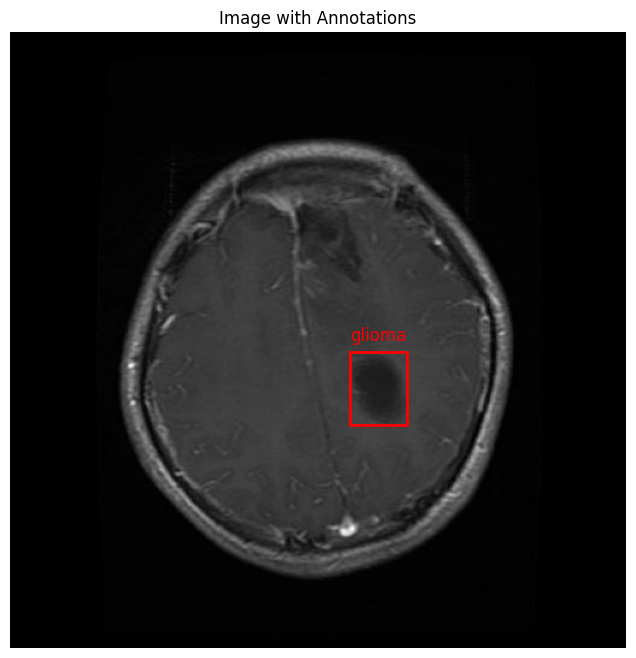

In [ ]:
random_images = random.sample(coco_data['images'], 10)

for image_info in random_images:
    image_id = image_info['id']
    annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] == image_id]
    plot_image_with_annotations(image_info, annotations, coco_data['categories'])